<a href="https://colab.research.google.com/github/rimbarbar/LL-LLM-Project/blob/main/LL_LLM_Project_Resub_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-Pre-processing

In [ ]:
 !pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
# Imports
from datasets import load_dataset
from transformers import AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading IMDb dataset and taking a small subset
dataset = load_dataset("imdb")
# Select 500 samples for train and test to reduce training time
dataset["train"] = dataset["train"].shuffle(seed=42).select(range(500))
dataset["test"] = dataset["test"].shuffle(seed=42).select(range(500))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# EDA
train_df = pd.DataFrame(dataset["train"])
print("Class Distribution:")
print(train_df["label"].value_counts())
print("\nReview Length Statistics:")
print(train_df["text"].str.len().describe())

Class Distribution:
label
0    254
1    246
Name: count, dtype: int64

Review Length Statistics:
count     500.000000
mean     1302.814000
std       988.857536
min       174.000000
25%       698.250000
50%       967.500000
75%      1541.750000
max      5241.000000
Name: text, dtype: float64


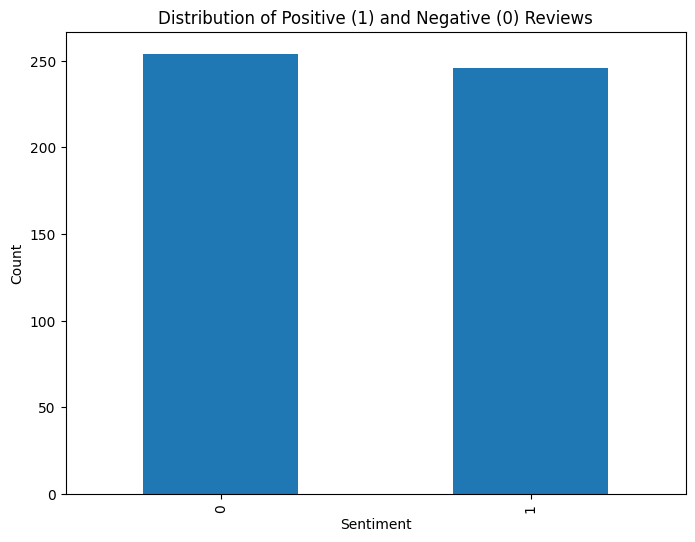

In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
train_df["label"].value_counts().plot(kind="bar")
plt.title("Distribution of Positive (1) and Negative (0) Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# Word count analysis
train_df["word_count"] = train_df["text"].str.split().str.len()
print("\nWord Count Statistics:")
print(train_df["word_count"].describe())


Word Count Statistics:
count    500.000000
mean     230.698000
std      172.461186
min       31.000000
25%      125.750000
50%      171.500000
75%      278.250000
max      947.000000
Name: word_count, dtype: float64


In [ ]:
# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# Save processed dataset
tokenized_datasets.save_to_disk("./tokenized_imdb")

print("Sample tokenized data:")
print(tokenized_datasets["train"][0]["input_ids"][:10])  # Shows first 10 tokens of first example

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/50000 [00:00<?, ? examples/s]

Sample tokenized data:
[101, 2045, 2003, 2053, 7189, 2012, 2035, 2090, 3481, 3771]
